In [12]:
import numpy as np
import os
import glob
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import fitsio
from scipy import stats


In [2]:
main_path = '/dvs_ro/cfs/cdirs/desi/spectro/redux/kibo/'

In [3]:
# tiles-kibo.fits and tiles-kibo.csv
#    exposures-kibo.fits and exposures-kibo.csv
#    zcatalog/v1/ztile-*.fits
#    zcatalog/v1/zall-tilecumulative-kibo.fits

In [4]:
def check_column(column):
    """Check if all values in a column are valid real numbers."""
    return np.all(np.isfinite(column) & np.isreal(column))

def print_range(column):
    """Print the range of values in a column."""
    valid_mask = np.isfinite(column) & np.isreal(column)
    valid_values = column[valid_mask]
    
    if len(valid_values) > 0:
        min_val = np.min(valid_values)
        max_val = np.max(valid_values)
        print(f"  Range: [{min_val}, {max_val}]")
    else:
        print("  Range: No valid values found")

def check_data(data):
    """Check all float columns in the given data table."""
    for col_name in data.colnames:
        if data[col_name].dtype.kind == 'f':  # 'f' represents float dtype
            is_valid = check_column(data[col_name])
            print(f"Column '{col_name}': All values are valid real numbers: {is_valid}")
            print_range(data[col_name])
            
            if not is_valid:
                problematic = data[col_name][~np.isfinite(data[col_name]) | ~np.isreal(data[col_name])]
                print(f"  Problematic values in '{col_name}': {problematic}")
            
            print()  

In [5]:
ztile_files = glob.glob(os.path.join(main_path,"zcatalog/v1/ztile-*.fits"))

In [17]:
for ztile_file in ztile_files:
    print('reading ', ztile_file)
    data = Table.read(ztile_file)
    check_data(data)

reading  /dvs_ro/cfs/cdirs/desi/spectro/redux/kibo/zcatalog/v1/ztile-special-dark-cumulative.fits


Column 'Z': All values are valid real numbers: True
  Range: [-0.004310378251838533, 6.983789886052087]

Column 'ZERR': All values are valid real numbers: True
  Range: [4.786930709466658e-48, 0.009804417005762503]

Column 'CHI2': All values are valid real numbers: True
  Range: [45.22760075330734, 9e+99]

Column 'COEFF': All values are valid real numbers: True
  Range: [-1181785.181246082, 785630.2775783662]

Column 'DELTACHI2': All values are valid real numbers: True
  Range: [1.329183578491211e-05, 1.942668892225729e+84]

Column 'TARGET_RA': All values are valid real numbers: True
  Range: [0.002577267146925445, 359.99858877103287]

Column 'TARGET_DEC': All values are valid real numbers: True
  Range: [-25.49414202024229, 44.77781320143652]

Column 'PMRA': All values are valid real numbers: True
  Range: [-179.7561798095703, 99.04987335205078]

Column 'PMDEC': All values are valid real numbers: True
  Range: [-192.1505584716797, 48.763851165771484]

Column 'REF_EPOCH': All values ar

In [6]:
zall_files = glob.glob(os.path.join(main_path,"zcatalog/v1/zall-*.fits"))

In [7]:
zcat_all = fitsio.read(zall_files[0], columns=['Z', 'FIBER', 'OBJTYPE'])

/tmp/ipykernel_284802/3881877386.py:1: DeprecationWarning: The keyword arguments '{'memmap': True}' are being ignored! This warning will be an error in a future version of `fitsio`!
  zcat_all = fitsio.read(zall_files[0], memmap=True, columns=['Z', 'FIBER', 'OBJTYPE'])


In [ ]:
zcat_all

In [8]:
objtype_counts = pd.Series(zcat_all['OBJTYPE']).value_counts()

In [9]:
objtype_counts

TGT    57338980
SKY     9613032
N/A     3124939
BAD       34895
NON         154
Name: count, dtype: int64

In [10]:
# Assuming zcat_all is your Astropy Table
# 1. Filter for targets
target_mask = zcat_all['OBJTYPE'] == 'TGT'
targets = zcat_all[target_mask]

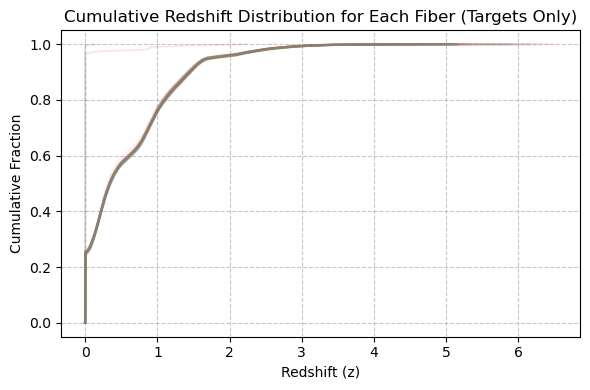

In [11]:
# 2. Get unique fiber IDs
unique_fibers = np.unique(targets['FIBER'])

# 3. Set up the plot
plt.figure(figsize=(6, 4))

# 4. For each fiber, calculate and plot the cumulative redshift distribution
for fiber in unique_fibers[:50]:
    fiber_mask = targets['FIBER'] == fiber
    fiber_data = targets[fiber_mask]
    
    # Sort redshifts
    z_sorted = np.sort(fiber_data['Z'])
    
    # Calculate cumulative distribution
    y = np.arange(1, len(z_sorted) + 1) / len(z_sorted)
    
    # Plot for this fiber
    plt.plot(z_sorted, y, alpha=0.1)  # alpha for transparency

# 5. Customize the plot
plt.xlabel('Redshift (z)')
plt.ylabel('Cumulative Fraction')
plt.title('Cumulative Redshift Distribution for Each Fiber (Targets Only)')
plt.grid(True, linestyle='--', alpha=0.7)

# 6. Show the plot
plt.tight_layout()


0
0.012502068905436259 0.02951341852356526
1
0.008155232809404889 0.33601319589507084
2
0.007136085566775252 0.5069819957345376
3
0.016738520273887558 0.0011593672638993198
4
0.012907636119287469 0.023921738833323738
5
0.014140206688302404 0.00958291428771161
6
0.011086434409218637 0.0742236984141984
7
0.009918182284357036 0.14515952276611666
8
0.01208504582060499 0.04219736528481732
9
0.011872680792482049 0.046999407594119025
10
0.011211982999662529 0.07068956665207704
11
0.007398547542845357 0.5107481664372735
12
0.008962772805840624 0.2349504044990246
13
0.013111061035369631 0.02070102803659171
14
0.014845276208863556 0.005675405364777567
15
0.01433624151613544 0.008172009014022954
16
0.00908692452392934 0.218518681918503
17
0.007004757252076943 0.5278705921317907
18
0.0066094216537238015 0.6044395845047335
19
0.00798728400696147 0.36109343024019935
20
0.009357019482178264 0.19193091991457512
21
0.007614922099079435 0.4208817563412002
22
0.007083600036300153 0.5126284342625007
23
0.

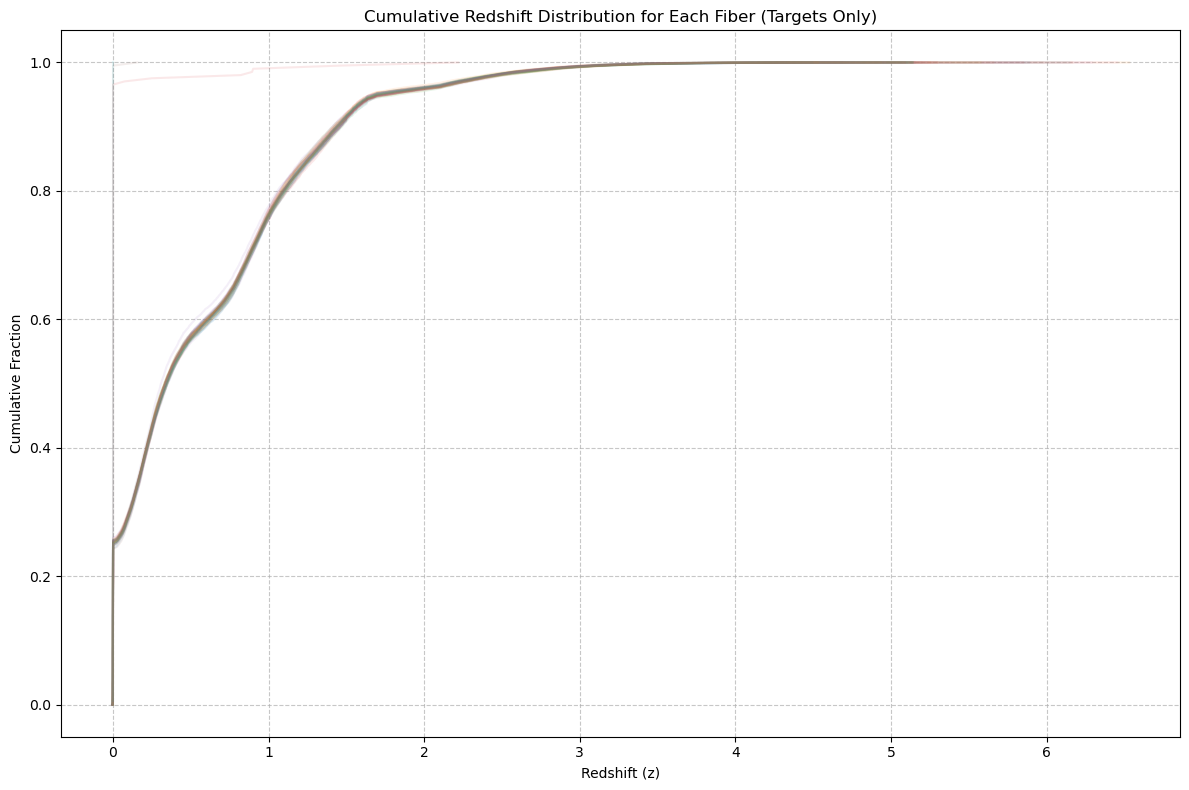

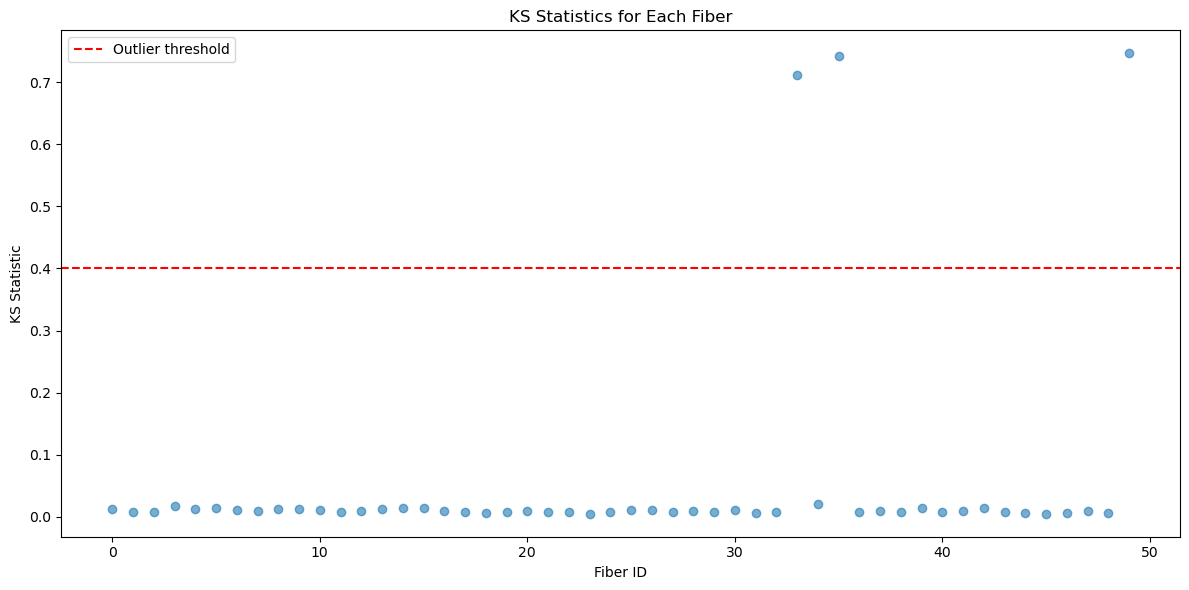

In [16]:
# Get the overall redshift distribution for all targets
all_z = targets['Z']

# 2. Get unique fiber IDs
unique_fibers = np.unique(targets['FIBER'])

# Prepare lists to store KS test results
ks_statistics = []
p_values = []
fiber_ids = []

# 3. Set up the plot
plt.figure(figsize=(12, 8))

# 4. For each fiber, calculate KS test and plot the cumulative redshift distribution
for fiber in unique_fibers[:50]:  # Limit to first 50 fibers for demonstration
    print(fiber)
    fiber_mask = targets['FIBER'] == fiber
    fiber_data = targets[fiber_mask]
    
    # Sort redshifts
    z_sorted = np.sort(fiber_data['Z'])
    
    # Calculate cumulative distribution
    y = np.arange(1, len(z_sorted) + 1) / len(z_sorted)
    
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(z_sorted, all_z)
    print(ks_statistic, p_value)
    ks_statistics.append(ks_statistic)
    p_values.append(p_value)
    fiber_ids.append(fiber)
    
    # Plot for this fiber
    plt.plot(z_sorted, y, alpha=0.1)  # alpha for transparency

# 5. Customize the plot
plt.xlabel('Redshift (z)')
plt.ylabel('Cumulative Fraction')
plt.title('Cumulative Redshift Distribution for Each Fiber (Targets Only)')
plt.grid(True, linestyle='--', alpha=0.7)

# 6. Show the plot
plt.tight_layout()

# 7. Identify outliers
# You can adjust these thresholds based on your specific needs
ks_threshold = np.percentile(ks_statistics, 95)  # Top 5% in KS statistic
p_value_threshold = 0.05

outliers = [(fid, ks, p) for fid, ks, p in zip(fiber_ids, ks_statistics, p_values) 
            if ks > ks_threshold or p < p_value_threshold]

print("Outlier fibers (Fiber ID, KS statistic, p-value):")
for outlier in outliers:
    print(f"Fiber {outlier[0]}: KS statistic = {outlier[1]:.4f}, p-value = {outlier[2]:.4e}")

# 8. Plot KS statistics
plt.figure(figsize=(12, 6))
plt.scatter(fiber_ids, ks_statistics, alpha=0.6)
plt.axhline(y=ks_threshold, color='r', linestyle='--', label='Outlier threshold')
plt.xlabel('Fiber ID')
plt.ylabel('KS Statistic')
plt.title('KS Statistics for Each Fiber')
plt.legend()
plt.tight_layout()
